# Week 3 - Principles of data visualization

## Part 1: Fundamentals of data visualization

**Exercise:**
- Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?
- What is the difference between a bar-chart and a histogram?
- How do you choose the right bin-size in histograms? Do a Google search to find a criterion you like and explain it.

**Answer:**
- ANSWER


## Part 2: Reading about the theory of visualization

**Exercise**: Questions for DAOST 
- Explain in your own words the point of the jitter plot.
- Explain in your own words the point of figure 2-3. 
- When can KDEs be misleading? 
- Janert writes "CDFs have less intuitive appeal than histograms of KDEs". What does he mean by that?
- What is a *Quantile plot*? What is it good for. 
- How is a *Probablity plot* defined? What is it useful for? Have you ever seen one before?
- One of the reasons we like DAOST is that Janert is so suspicious of mean, median, and related summary statistics. Explain why one has to be careful when using those - and why visualization of the full data is always better. 
- When are box plots most useful?
- Are violin plots better or worse than box plots? Why?
- Explain in your own words how this video illustrates potential issues even with box-plots? Do violin-plots help with that issue?

**Answers:**
- ANSWER

## Part 3: Visualizations based on the book

**Exercise Part 1**: Connecting the dots and recreating plots from DAOST

In [1]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import math

# Load the DataFrame
data_path = os.path.abspath(os.path.join(os.pardir, "data"))
cleaned_data_path = os.path.join(data_path, "Police_Department_Incident_Reports_Complete.csv")
df = pd.read_csv(cleaned_data_path)

# Define focus crimes
focuscrimes = {'WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 
               'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 
               'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'}

# Define the order of the days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Filter data for focus crimes
df_focus = df[df['Category'].isin(focuscrimes)]

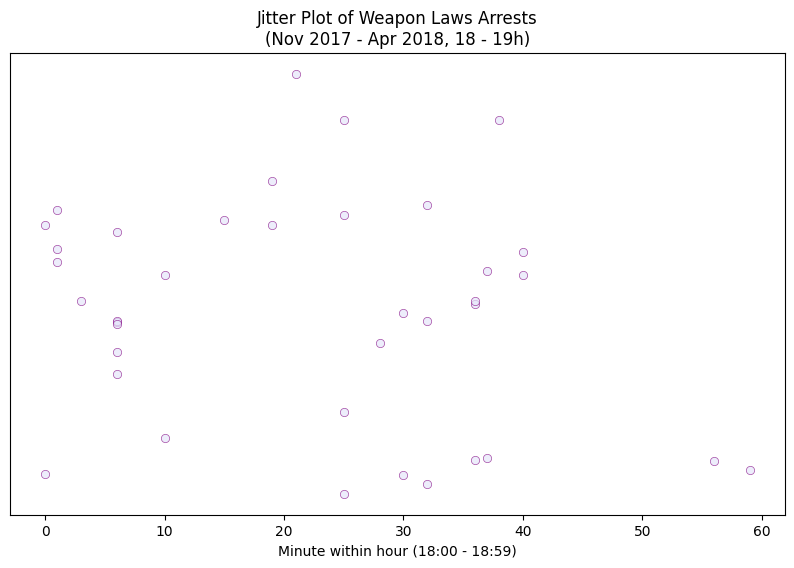

In [2]:
# Making a jitter-plot based on SF Police data of the arrest times during a single hour (18-19) between Nov 2017 and April 2018

# Filter data for weapon laws and the desired time interval:
weapon_df = df_focus[df_focus['Category'] == 'WEAPON LAWS']
weapon_df = weapon_df[((weapon_df['Year'] == 2017) & (weapon_df['Month'].isin([11, 12]))) | 
                      ((weapon_df['Year'] == 2018) & (weapon_df['Month'].isin([1, 2, 3, 4])))]

# Further filter to 18:00 - 18:59
weapon_hour = weapon_df[weapon_df['Hour'] == 18].copy()

# Create a vertical jitter value (a small random offset) so points don't overlap
weapon_hour.loc[:, 'Jitter'] = np.random.normal(0, 0.1, size=len(weapon_hour))

# Now create the jitter plot using the actual Minute column on the x-axis:
plt.figure(figsize=(10, 6))
plt.scatter(weapon_hour['Minute'], weapon_hour['Jitter'], 
            alpha=0.7, color='lavender', edgecolor='purple', linewidth=0.5)
plt.xlabel('Minute within hour (18:00 - 18:59)')
plt.title('Jitter Plot of Weapon Laws Arrests\n(Nov 2017 - Apr 2018, 18 - 19h)')
plt.xticks(np.arange(0, 61, 10))
plt.yticks([])  # Remove y-ticks since they represent only random jitter
plt.show()


Prostitution data points: 1493
Vandalism data points: 9719


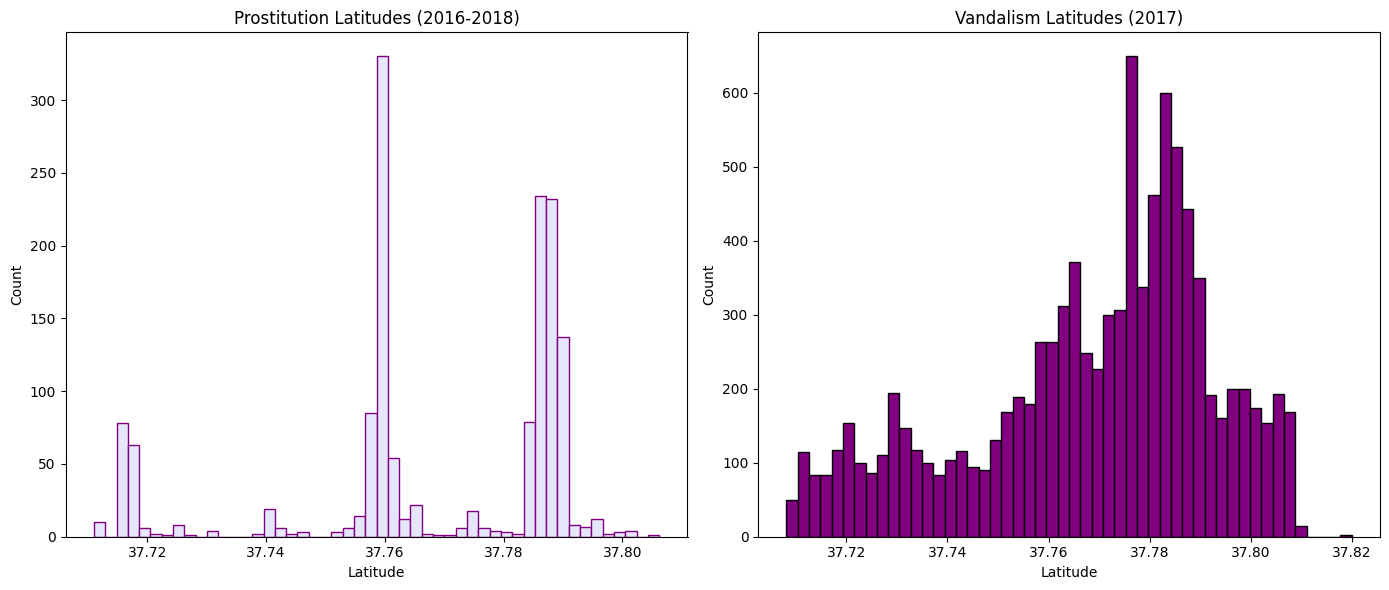

In [3]:
# Making a histogram for prostitution and vandalism from 2016 - 2018

# Filter for the time interval 2016 - end of 2018
df_interval1 = df_focus[(df_focus['Year'] >= 2016) & (df_focus['Year'] <= 2018)]
df_interval2 = df_focus[(df_focus['Year'] >= 2017) & (df_focus['Year'] <= 2017)]

# Choose the crimes "PROSTITUTION" and "VANDALISM" 
df_prostitution = df_interval1[df_interval1['Category'] == 'PROSTITUTION']
df_vandalism = df_interval2[df_interval2['Category'] == 'VANDALISM']

# Print the number of data points for each crime
print("Prostitution data points:", len(df_prostitution))
print("Vandalism data points:", len(df_vandalism))

# Extract the latitude for each crime (assumed to be in the "Latitude (Y)" column)
lat_prostitution = df_prostitution["Latitude (Y)"].dropna()
lat_vandalism = df_vandalism["Latitude (Y)"].dropna()

# Bin the latitudes into ~50 bins using numpy.histogram
counts_pro, bin_edges_pro = np.histogram(lat_prostitution, bins=50)
counts_van, bin_edges_van = np.histogram(lat_vandalism, bins=50)

# Plot the histograms side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Prostitution
axes[0].bar(bin_edges_pro[:-1], counts_pro, 
            width=(bin_edges_pro[1]-bin_edges_pro[0]), 
            align='edge', color='lavender', edgecolor='purple')
axes[0].set_title("Prostitution Latitudes (2016-2018)")
axes[0].set_xlabel("Latitude")
axes[0].set_ylabel("Count")

# Plot for Vandalism
axes[1].bar(bin_edges_van[:-1], counts_van, 
            width=(bin_edges_van[1]-bin_edges_van[0]), 
            align='edge', color='purple', edgecolor='black')
axes[1].set_title("Vandalism Latitudes (2017)")
axes[1].set_xlabel("Latitude")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

number of weapon law data points: 38


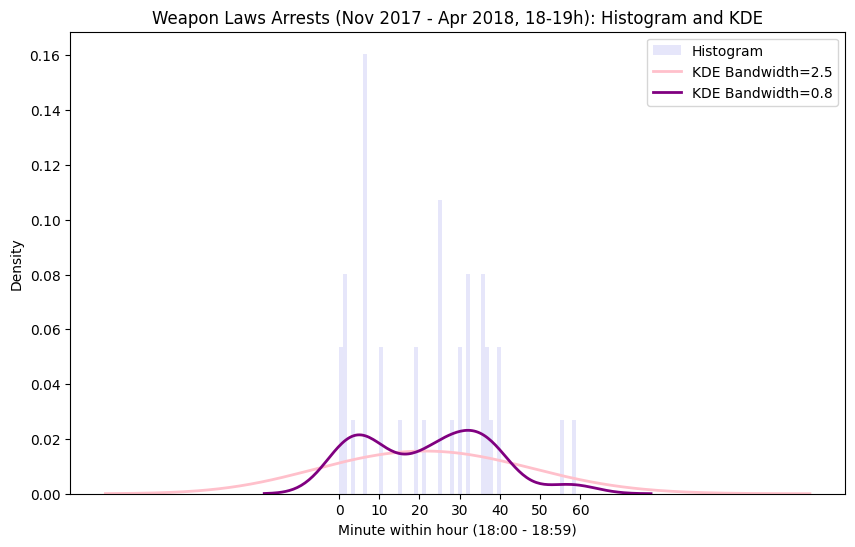

In [4]:
# Figure 2-4 from DAOST with weapon law arrest data. 
# Create kernel density plots using pandas based strategy
import seaborn as sns

print("number of weapon law data points:", len(weapon_hour))

plt.figure(figsize=(10, 6))

# Plot the histogram as striped lines
plt.hist(weapon_hour['Minute'], bins=60, density=True, 
         color='lavender', linewidth=1.5, label='Histogram')

# KDE with bandwidth adjustment of 2.5
sns.kdeplot(weapon_hour['Minute'], bw_adjust=2.5, label="KDE Bandwidth=2.5",
            color='pink', linewidth=2)

# KDE with bandwidth adjustment of 0.8
sns.kdeplot(weapon_hour['Minute'], bw_adjust=0.8, label="KDE Bandwidth=0.8",
            color='purple', linewidth=2)

plt.xlabel('Minute within hour (18:00 - 18:59)')
plt.title('Weapon Laws Arrests (Nov 2017 - Apr 2018, 18-19h): Histogram and KDE')
plt.xticks(np.arange(0, 61, 10))
plt.legend()
plt.show()


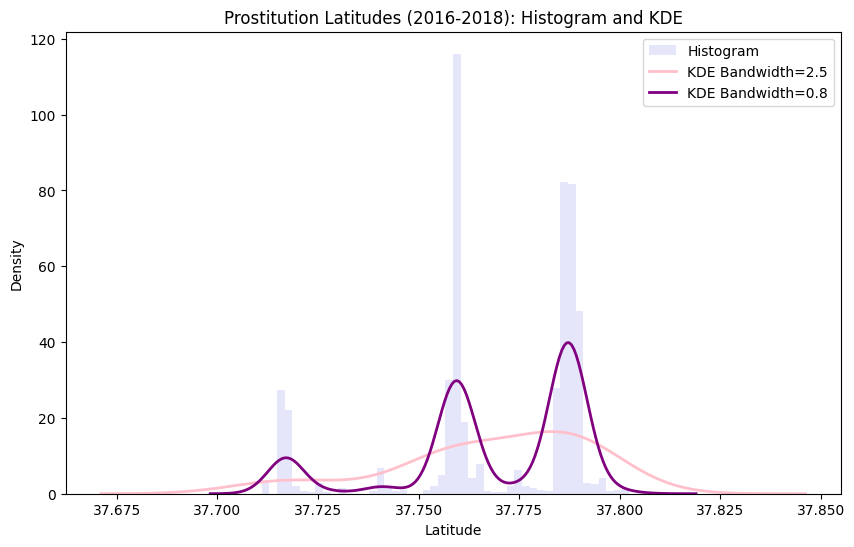

In [5]:
# Kernel density plot for prostitution latitudes
plt.figure(figsize=(10, 6))

# Plot the histogram as striped lines (using a step-type histogram)
plt.hist(lat_prostitution, bins=50, density=True,
         color='lavender', linewidth=0.5, label='Histogram')

# Plot the KDE with a bandwidth adjustment of 2.5
sns.kdeplot(lat_prostitution, bw_adjust=2.5, label="KDE Bandwidth=2.5", 
            color='pink', linewidth=2)

# Plot the KDE with a bandwidth adjustment of 0.8
sns.kdeplot(lat_prostitution, bw_adjust=0.8, label="KDE Bandwidth=0.8", 
            color='purple', linewidth=2)

plt.xlabel("Latitude")
plt.title("Prostitution Latitudes (2016-2018): Histogram and KDE")
plt.legend()
plt.show()


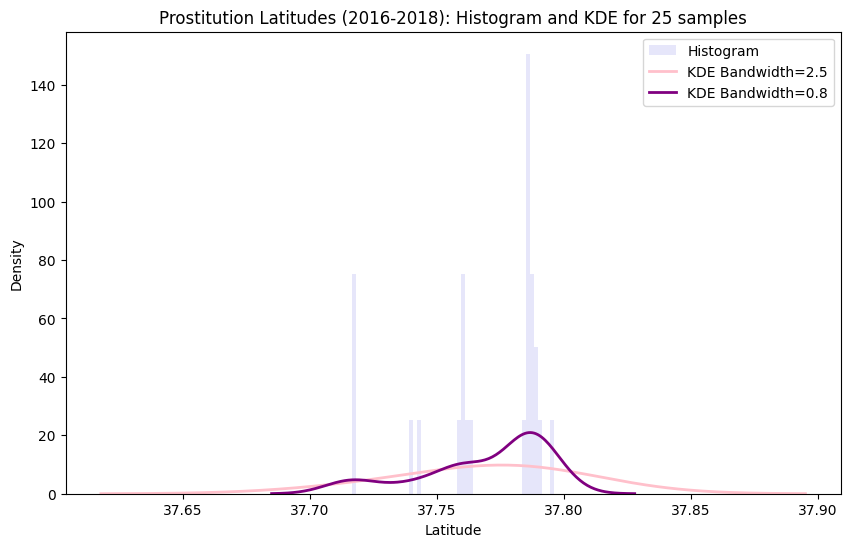

In [6]:
# Taking 25 random timepoints from the dataset (originally: 1493)
lat_prostitution_sample = lat_prostitution.sample(25, random_state=1)

plt.figure(figsize=(10, 6))

# Plot the histogram as striped lines (using a step-type histogram)
plt.hist(lat_prostitution_sample, bins=50, density=True,
         color='lavender', linewidth=0.5, label='Histogram')

# Plot the KDE with a bandwidth adjustment of 2.5
sns.kdeplot(lat_prostitution_sample, bw_adjust=2.5, label="KDE Bandwidth=2.5", 
            color='pink', linewidth=2)

# Plot the KDE with a bandwidth adjustment of 0.8
sns.kdeplot(lat_prostitution_sample, bw_adjust=0.8, label="KDE Bandwidth=0.8", 
            color='purple', linewidth=2)

plt.xlabel("Latitude")
plt.title("Prostitution Latitudes (2016-2018): Histogram and KDE for 25 samples")
plt.legend()
plt.show()


- Now grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can be misleading? 

**Answer:** ANSWER

**Exercise Part 2**:

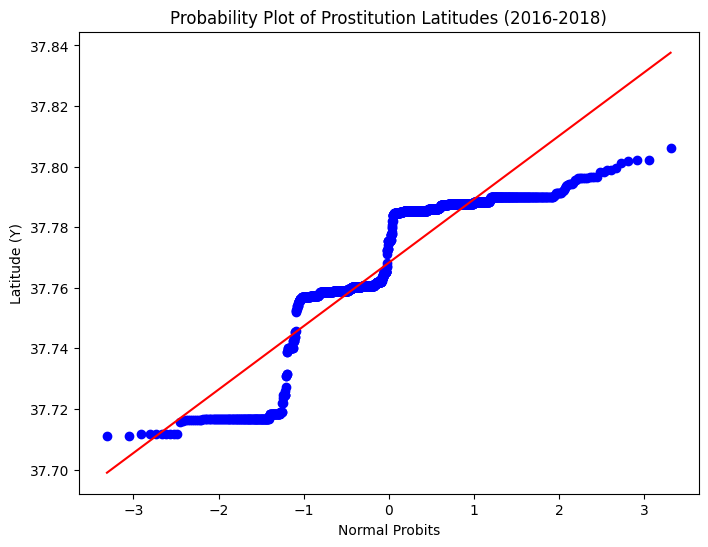

In [7]:
# Making a probability plot using the GPS data from the prostitution data
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(lat_prostitution, dist="norm", plot=plt)
plt.title("Probability Plot of Prostitution Latitudes (2016-2018)")
plt.xlabel("Normal Probits")
plt.ylabel("Latitude (Y)")
plt.show()

/var/folders/4x/yhtdnw892qb8jnq411phhh340000gn/T/ipykernel_26481/1030729852.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_focus['Date'] = pd.to_datetime(df_focus[['Year', 'Month', 'Day']])
/var/folders/4x/yhtdnw892qb8jnq411phhh340000gn/T/ipykernel_26481/1030729852.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data_to_plot, labels=categories, patch_artist=True)


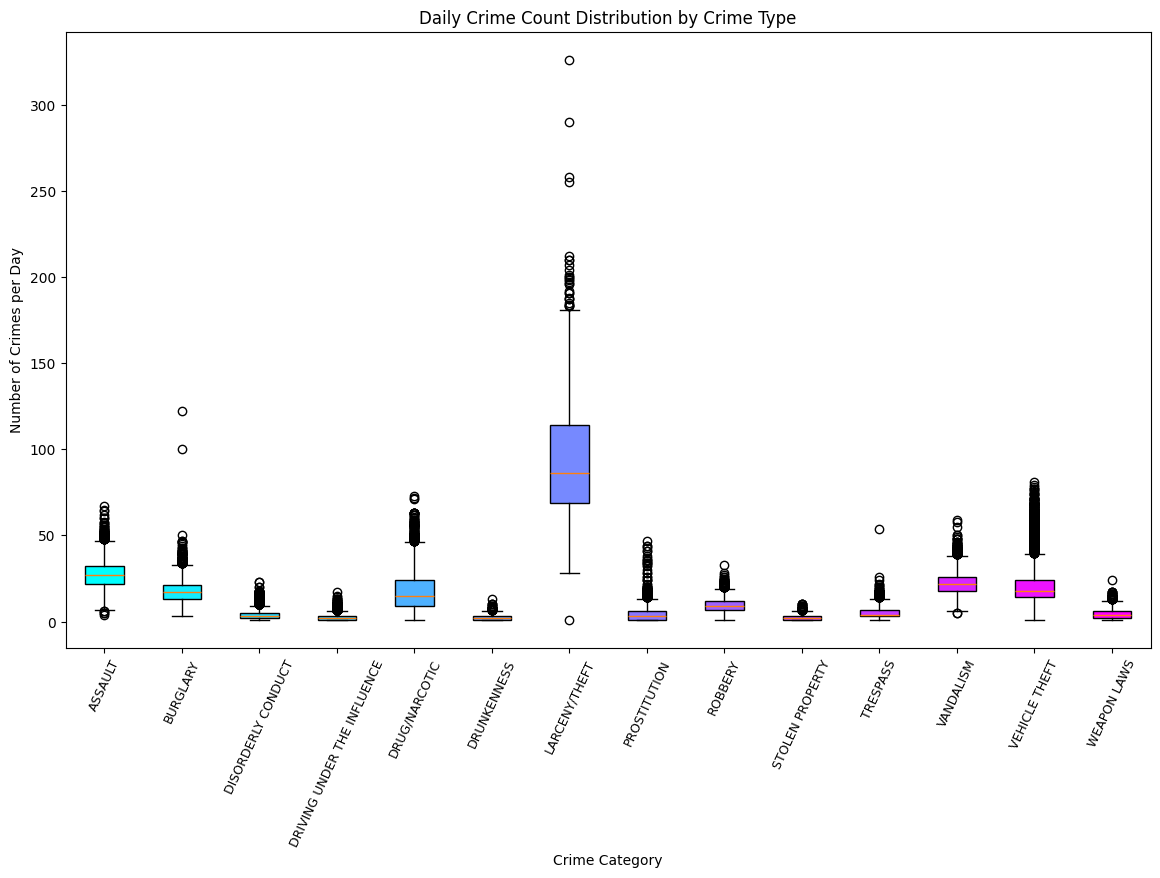

In [8]:
# Make box plots that show the crime per day for each focus crime category

import pandas as pd
import matplotlib.pyplot as plt

# Group by Category and Date to count crimes per day for each category
df_focus['Date'] = pd.to_datetime(df_focus[['Year', 'Month', 'Day']])
daily_counts = df_focus.groupby(['Category', 'Date']).size().reset_index(name='Count')

# For each category, extract the array of daily crime counts
categories = sorted(daily_counts['Category'].unique())
data_to_plot = [daily_counts[daily_counts['Category'] == cat]['Count'].values for cat in categories]

# Create the box-and-whiskers plot using matplotlib's built-in functionality
plt.figure(figsize=(14, 8))
box = plt.boxplot(data_to_plot, labels=categories, patch_artist=True)

colors = plt.cm.cool(np.linspace(0, 1, len(categories)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xticks(size=9, rotation=65)
plt.xlabel('Crime Category')
plt.ylabel('Number of Crimes per Day')
plt.title('Daily Crime Count Distribution by Crime Type')
plt.show()


-  What does this plot reveal that you can't see in the plots from last time? --> We can see the distribution of the crime counts better, as any outliers are visualized. It also shows whether some crimes consistently occur or which ones have sporadic bursts or extreme values, this can help identify patterns in crime occurrence.

/var/folders/4x/yhtdnw892qb8jnq411phhh340000gn/T/ipykernel_26481/3893210135.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_focus['TimeOfDay'] = df_focus['Hour'] + df_focus['Minute'] / 60.0
/var/folders/4x/yhtdnw892qb8jnq411phhh340000gn/T/ipykernel_26481/3893210135.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data_to_plot, labels=categories, patch_artist=True, showfliers=True)


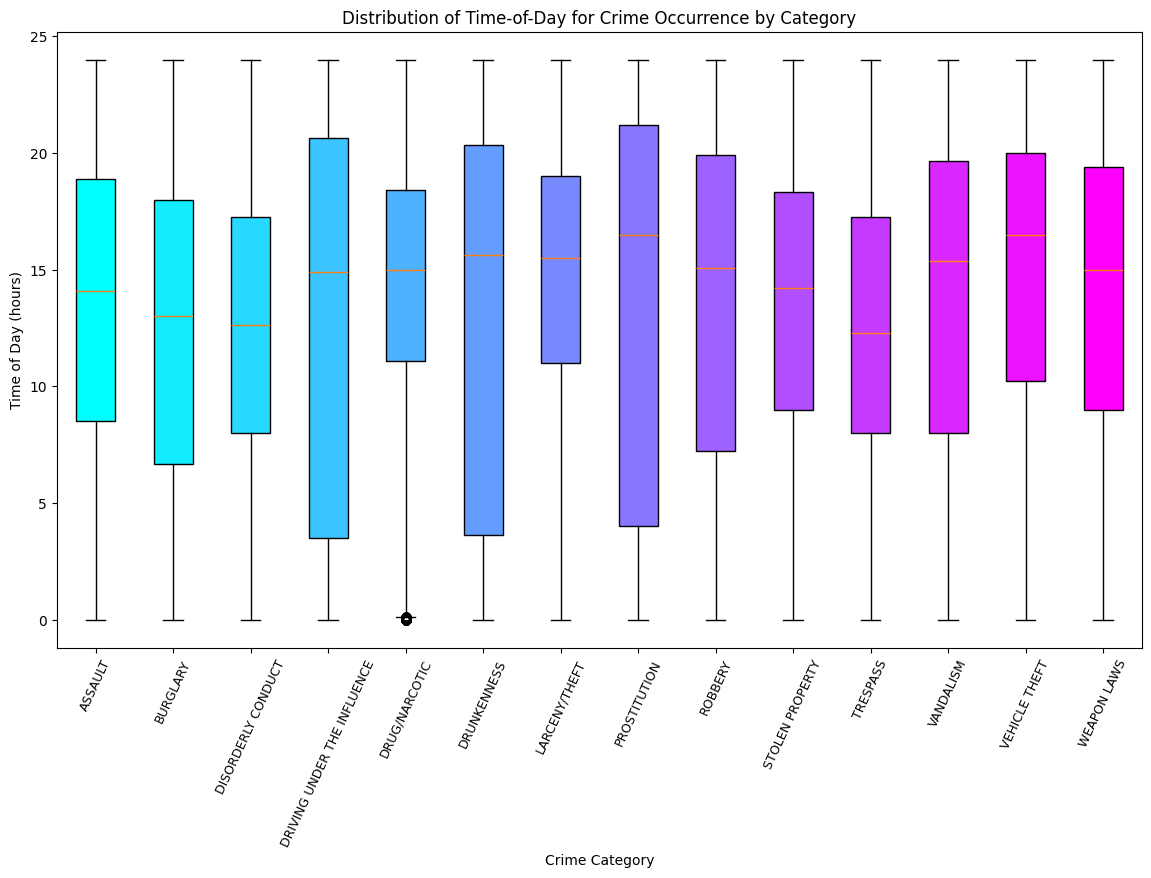

In [9]:
# Make box plots for the time of day for each focus crime category

# Create a new column 'TimeOfDay' that converts Hour and Minute to a decimal value
df_focus['TimeOfDay'] = df_focus['Hour'] + df_focus['Minute'] / 60.0

# For each crime category, collect the TimeOfDay values
categories = sorted(df_focus['Category'].unique())
data_to_plot = [df_focus[df_focus['Category'] == cat]['TimeOfDay'].values for cat in categories]

# Create one big figure with box plots for each crime category
plt.figure(figsize=(14, 8))
box = plt.boxplot(data_to_plot, labels=categories, patch_artist=True, showfliers=True)

# Optionally, customize the color for each box using a colormap for better distinction
colors = plt.cm.cool(np.linspace(0, 1, len(categories)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xlabel("Crime Category")
plt.ylabel("Time of Day (hours)")
plt.title("Distribution of Time-of-Day for Crime Occurrence by Category")
plt.xticks(size=9, rotation=65)
plt.show()

## Part 4: Visualizing geodata with Plotly


**Exercise**: Let's plot a map with some random values in it.

In [10]:
randomdata = {
    'CENTRAL': 0.4821,
    'SOUTHERN': 0.9153,
    'BAYVIEW': 0.3674,
    'MISSION': 0.7542,
    'PARK': 0.6285,
    'RICHMOND': 0.2147,
    'INGLESIDE': 0.05391,
    'TARAVAL': 0.007846,
    'NORTHERN': 0.4938,
    'TENDERLOIN': 0.08127
}

In [11]:
# Getting the shape files
# Read shapefile from the provided geojson file
geojson_name = "sfpd.geojson"
files_path = os.path.abspath(os.path.join(os.pardir, "files"))
geojson_path = os.path.join(files_path, geojson_name)

In [12]:
import json

with open(geojson_path) as response:
    counties = json.load(response)

df_rand = pd.DataFrame(randomdata.items(), columns=['district', 'value'])
df_rand.head()

,district,value
0,CENTRAL,0.4821
1,SOUTHERN,0.9153
2,BAYVIEW,0.3674
3,MISSION,0.7542
4,PARK,0.6285


In [19]:
import plotly.express as px

# Create a choropleth map
fig = px.choropleth_map(
    df_rand,
    geojson=counties,
    locations='district',          # use district as the id column
    featureidkey="properties.DISTRICT",  # adjust this key to match your geojson district property
    color='value',
    color_continuous_scale="Viridis",
    range_color=(0, 1),            # adjust the range for your data
    map_style="open-street-map",
    zoom=10.5,                       # set a zoom level appropriate for SF
    center={"lat": 37.7749, "lon": -122.4194},  # center on San Francisco
    opacity=0.5,
    labels={'value': 'Random Value'}
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**Exercise:**

Main goal: *determine the districts where you should (and should not) leave your car on Sundays*. (Or stated differently, count up the number of thefts.)


In [23]:
# Create a choropleth map with the vehicle theft data

# Filter the dataset to only include vehicle thefts on Sundays.
vehicle_theft_sunday = df_focus[(df_focus['Category'] == 'VEHICLE THEFT') & 
                                (df_focus['Day of Week'] == 'Sunday')]

# Aggregate by police district to count the number of thefts in each district.
theft_counts = vehicle_theft_sunday.groupby('Police District').size().reset_index(name='theft_count')

# Create the choropleth map.
# Note: We assume that the geojson file (sfpd.geojson) uses the property "DISTRICT" to denote the police district.
fig = px.choropleth_mapbox(
    theft_counts,
    geojson=counties,
    locations='Police District',         
    featureidkey="properties.DISTRICT",  # Adjust if your geojson uses a different key
    color='theft_count',
    color_continuous_scale="Reds",
    # Set the color range based on the actual theft counts in your data.
    range_color=(theft_counts['theft_count'].min(), theft_counts['theft_count'].max()),
    mapbox_style="open-street-map",
    zoom=10.5,                       # Adjust zoom to focus on San Francisco
    center={"lat": 37.7749, "lon": -122.4194},
    opacity=0.7,
    labels={'theft_count': 'Vehicle Thefts on Sunday'}
)

# Add layout settings including a colorbar (displayed automatically)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()



/var/folders/4x/yhtdnw892qb8jnq411phhh340000gn/T/ipykernel_26481/1694725815.py:12: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



- Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place? --> Tenderloin would be safest and Ingleside would be the worst. 

- Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident? --> If i use a bigger range of data it is less evident and seems safer.

In [24]:
fig = px.choropleth_mapbox(
    theft_counts,
    geojson=counties,
    locations='Police District',         
    featureidkey="properties.DISTRICT",  # Adjust if your geojson uses a different key
    color='theft_count',
    color_continuous_scale="Reds",
    # Set the color range based on the actual theft counts in your data.
    range_color=(theft_counts['theft_count'].min(), 10000),
    mapbox_style="open-street-map",
    zoom=10.5,                       # Adjust zoom to focus on San Francisco
    center={"lat": 37.7749, "lon": -122.4194},
    opacity=0.7,
    labels={'theft_count': 'Vehicle Thefts on Sunday'}
)

# Add layout settings including a colorbar (displayed automatically)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

/var/folders/4x/yhtdnw892qb8jnq411phhh340000gn/T/ipykernel_26481/1171110321.py:1: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



- Why do you think perceptual errors are a problem? Try to think of a few examples. --> People can over- or underestimate things, such as danger, statistics, etc. (anything really). 